In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

def convolution(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the required padding to handle edge pixels
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    convolved_img = np.zeros_like(img, dtype=np.float32)

    # Pad the input img
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    for ht in range(img_height):
        for wdth in range(img_width):
            region_of_interest = padded_img[ht:ht+kernel_height, wdth:wdth+kernel_width]
            convolved_img[ht, wdth] = np.sum(region_of_interest * kernel)

    return convolved_img

In [2]:
img = cv2.imread('/content/drive/MyDrive/DIP A1 data/tank.tiff')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

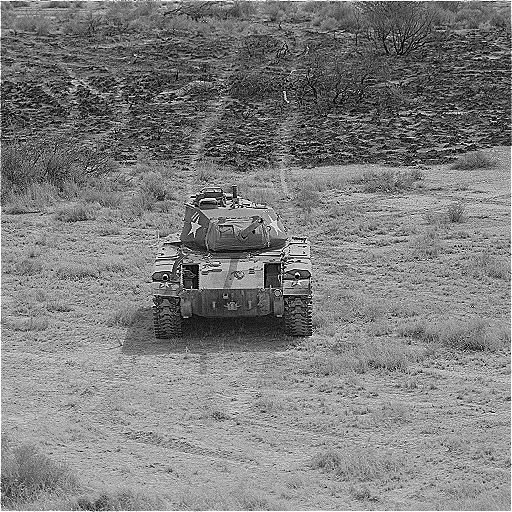

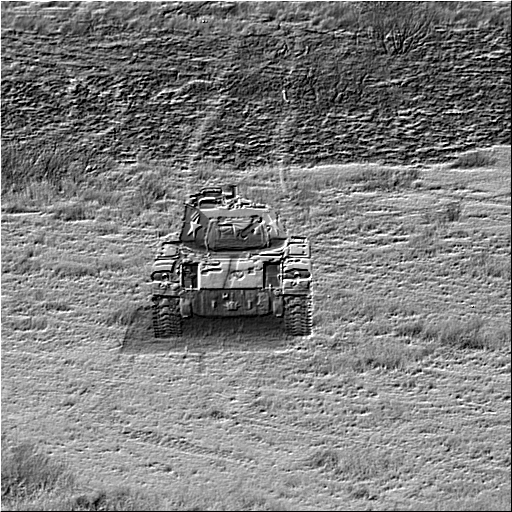

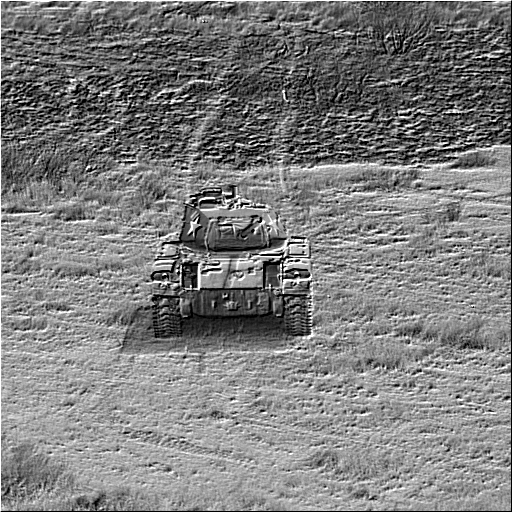

In [3]:
# Sharpening filter
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened_img = convolution(gray_img, sharpen_kernel)



# Robert filter
robert_kernel_x = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

robert_kernel_y= np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sharpened_robert_x = convolution(gray_img, robert_kernel_x)
sharpened_robert_y = convolution(gray_img, robert_kernel_y)
sharpened_robert = cv2.addWeighted(sharpened_robert_x, 0.3, sharpened_robert_y, 0.3, 0)
sharpened_robert = gray_img + 1.75 * sharpened_robert



# Prewitt filter
prewitt_kernel_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])

sharpened_prewitt_x = convolution(gray_img, prewitt_kernel_x)
sharpened_prewitt_y = convolution(gray_img, prewitt_kernel_y)
sharpened_prewitt = cv2.addWeighted(sharpened_prewitt_x, 0.5, sharpened_prewitt_y, 0.5, 0)
sharpened_prewitt = gray_img + 1.5 * sharpened_prewitt

cv2_imshow(sharpened_img)
print()
cv2_imshow(sharpened_robert)
print()
cv2_imshow(sharpened_prewitt)

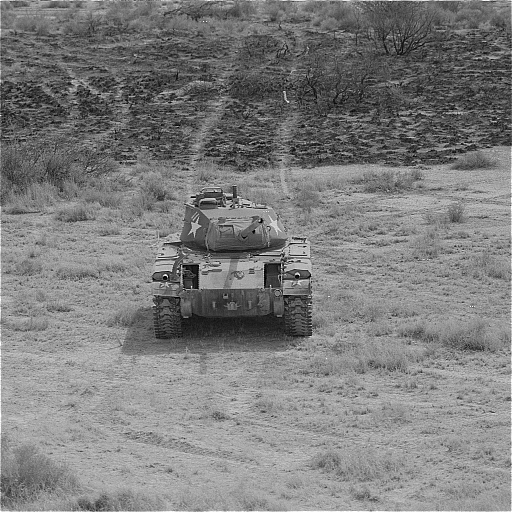

In [4]:
# Define the kernel size for Gaussian blur
kernel_size = 3
sigma = 1

def gaussian_kernel(kernel_size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * math.pi * sigma ** 2)) *
                      np.exp(-((x - (kernel_size-1)/2)**2 + (y - (kernel_size-1)/2)**2) / (2 * sigma ** 2)),
        (kernel_size, kernel_size)
    )
    return kernel / np.sum(kernel)  # Normalize the kernel to ensure it sums to

def apply_gaussian_blur(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    padding_height = kernel_height // 2
    padding_width = kernel_width // 2

    padded_img = np.pad(img, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')
    output = np.zeros((img_height, img_width))

    for i in range(img_height):
        for j in range(img_width):
            output[i, j] = np.sum(padded_img[i:i+kernel_height, j:j+kernel_width] * kernel)
    return output

gaussian_kernel = gaussian_kernel(kernel_size, sigma)
blurred_img = apply_gaussian_blur(gray_img, gaussian_kernel)
high_pass_img = gray_img - blurred_img
sharpened_img = gray_img + 1.5 * high_pass_img
cv2_imshow(sharpened_img)

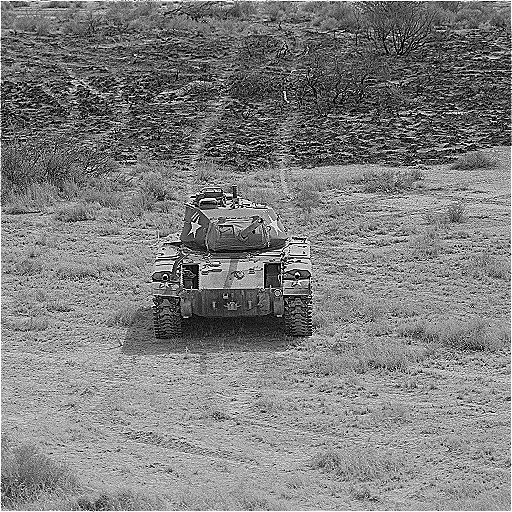

In [5]:
# Laplacian filter
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

sharpened_laplacian = convolution(gray_img, laplacian_kernel)
sharpened_laplacian = gray_img + 1.5 * sharpened_laplacian
cv2_imshow(sharpened_laplacian)
print()

The high pass filtered image using 3x3 filter:


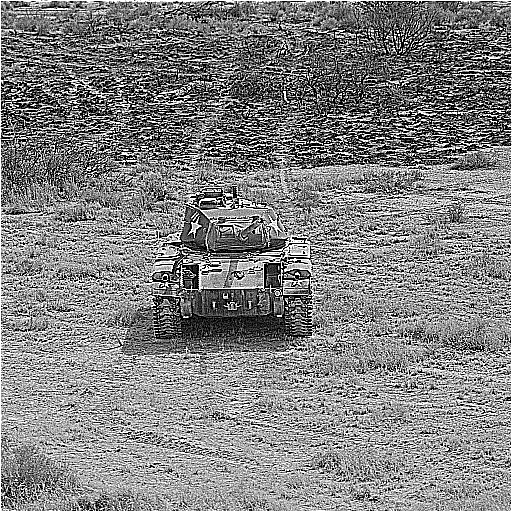


The high pass filtered image using 5x5 filter:


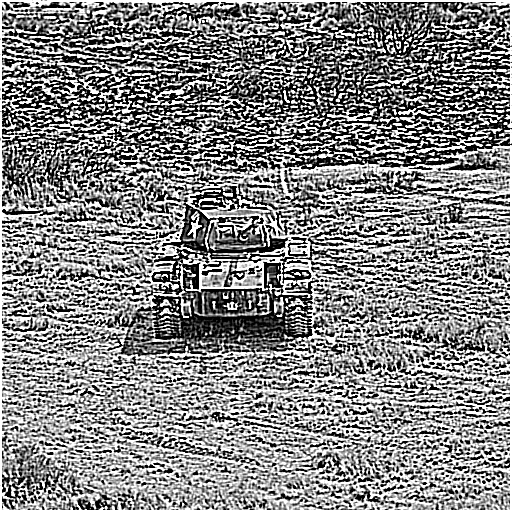

In [7]:
# High pass filter

# 3x3
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
highpass_3x3 = convolution(gray_img, kernel)
sharpened_highpass_3x3 = gray_img + 1.5 * highpass_3x3

# 5x5
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
highpass_5x5 = convolution(gray_img, kernel)
sharpened_highpass_5x5 = gray_img + 1.5 * highpass_5x5

print('The high pass filtered image using 3x3 filter:')
cv2_imshow(sharpened_highpass_3x3)
print()
print('The high pass filtered image using 5x5 filter:')
cv2_imshow(sharpened_highpass_5x5)
